# K-Means Clustering: Student Performance Analysis

## **Scenario**
Imagine you are a data scientist working for a school that wants to better understand student performance patterns. The goal is to segment students into distinct groups based on their academic achievements and engagement levels. By identifying these groups, the school aims to tailor support programs, personalise teaching strategies, and improve overall student success.

## **Dataset Features**
1. **Test Scores**: Average scores from assessments.
2. **Assignment Completion Rate**: Percentage of assignments completed by each student.
3. **Class Participation**: Number of participation points earned in class activities.
4. **Study Hours per Week**: Average time spent studying outside of class.
5. **Attendance Rate**: Percentage of classes attended.
6. **Extra-Curricular Activities**: Number of extra-curricular activities participated in.

## **Your Challenge Objective**
Group students into clusters to identify patterns in their performance and engagement, such as:
- High-performing, well-rounded students.
- Average-performing students with room for improvement.
- Low-performing students needing additional support.


## Step 1: Import Libraries

In [39]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For standardising features
import matplotlib.pyplot as plt  # For creating visualisations
import seaborn as sns  # For enhanced data visualisation


## Step 2: Load the Dataset

In [41]:
# Load the dataset
file_path = 'Students_Performance.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

   Test_Scores  Assignment_Completion_Rate  Class_Participation  \
0           61                          67                    7   
1           92                          92                   22   
2           56                          69                    8   
3           57                          61                    0   
4           92                          95                   22   

   Study_Hours_per_Week  Attendance_Rate  Extra_Curricular_Activities  
0                     7               72                            0  
1                    15               94                            4  
2                     8               76                            0  
3                     9               72                            1  
4                    15               92                            3  


## Step 3: Standardising the Data

In [43]:
# Initialise the StandardScaler
scaler = StandardScaler() # StandardScaler is a preprocessing tool that standardises the features in the dataset. It scales each feature to have a mean of 0 and a standard deviation of 1.
scaled_data = scaler.fit_transform(data) # fit_transform() calculates the mean and standard deviation for scaling, and then transforms the data accordingly.

## Step 4: Use Elbow method to find optimal number of clusters

In [72]:

inertia = []
# Loop through cluster counts from 1 to 10
for k in range(1, 11):
    # Initialise KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_data)
    # Append the inertia value (sum of squared distances) to the list
    inertia.append(kmeans.inertia_)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

## Step 5: Plotting the Elbow Curve

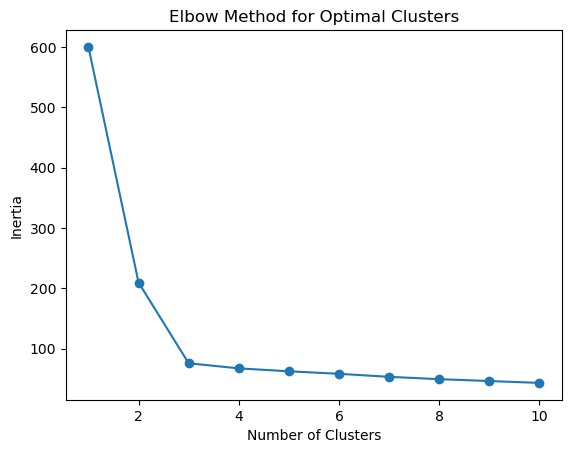

In [74]:
# Plot the number of clusters (x-axis) against the inertia values (y-axis)
plt.plot(range(1, 11), inertia, marker='o')

# Set the title of the plot to indicate the purpose of the visualisation
plt.title('Elbow Method for Optimal Clusters')

# Label the x-axis to indicate it represents the number of clusters
plt.xlabel('Number of Clusters')

# Label the y-axis to indicate it represents the inertia values
plt.ylabel('Inertia')

# Display the plot
plt.show()


The Elbow Chart showed an "elbow" at **3 clusters**, indicating that this is the optimal number. Therefore, n_clusters=3.


In [76]:
# random_state=42 ensures reproducibility of results
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the scaled data to compute the cluster assignments
kmeans.fit(scaled_data)

# Add the cluster labels assigned to each data point as a new column in the dataset
data['Cluster'] = kmeans.labels_


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 6: Visualising Clusters Using Principal Component Analysis (PCA) for Dimensionality Reduction

In [78]:
from sklearn.decomposition import PCA

# Reducing dimensions for visualisation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Adding cluster labels
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]


## Step 7: Plotting the Clusters

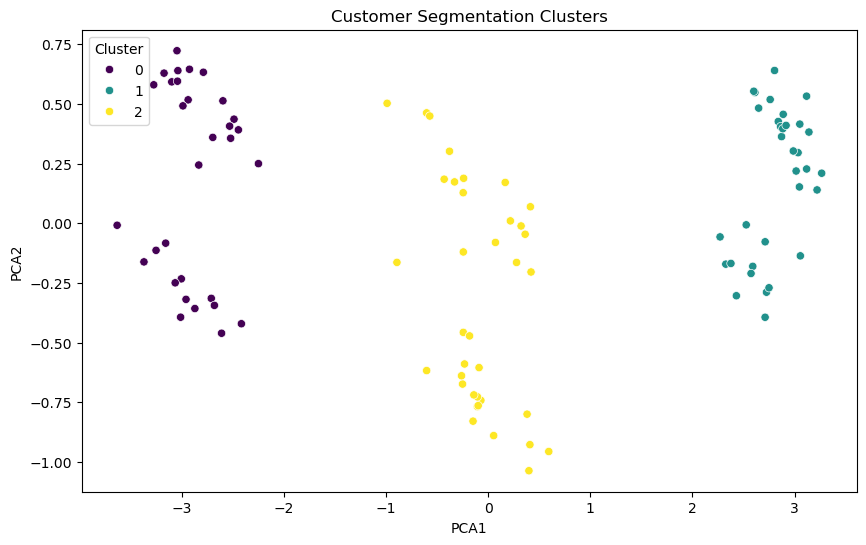

In [80]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
# Create a scatter plot of the clusters using PCA components for visualisation
# 'x' and 'y' correspond to the first two principal components (PCA1 and PCA2)
# 'hue' differentiates the clusters using the 'Cluster' column in the dataset
# 'data' is the dataset containing the PCA-transformed features and cluster labels
# 'palette' sets the color scheme for the clusters



# Add a title to the plot
plt.title('Customer Segmentation Clusters')

# Label the x-axis as 'PCA1'
plt.xlabel('PCA1')

# Label the y-axis as 'PCA2'
plt.ylabel('PCA2')

# Add a legend with the title 'Cluster' to indicate which color represents each cluster
plt.legend(title='Cluster')

# Display the plot
plt.show()


## Step 8: Analysing Cluster Characteristics

In [82]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

         Test_Scores  Assignment_Completion_Rate  Class_Participation  \
Cluster                                                                 
0          58.225806                   64.935484             4.612903   
1          91.666667                   93.666667            23.606061   
2          75.333333                   80.694444            15.055556   

         Study_Hours_per_Week  Attendance_Rate  Extra_Curricular_Activities  \
Cluster                                                                       
0                    6.870968        74.129032                     0.580645   
1                   16.484848        94.606061                     3.636364   
2                   11.944444        84.305556                     1.472222   

             PCA1      PCA2  
Cluster                      
0       -2.883099  0.178922  
1        2.809869  0.176176  
2       -0.093045 -0.315566  


### **Interpretation and Summary of Cluster Profiles**

The clustering results reveal three distinct student performance groups based on their academic engagement and achievements. Here's the interpretation for each cluster:

### **Cluster 0: Low-Performing Students**
- **Test Scores**: Average of ~58.23, indicating below-average performance in tests.
- **Assignment Completion Rate**: ~64.93%, showing inconsistent assignment submissions.
- **Class Participation**: ~4.61, reflecting minimal engagement in class activities.
- **Study Hours per Week**: ~6.87 hours, suggesting limited study efforts outside of class.
- **Attendance Rate**: ~74.13%, indicating frequent absences from class.
- **Extra-Curricular Activities**: ~0.58, showing little to no participation in extra-curricular activities.

**Insights**:
- Cluster 0 consists of students struggling academically and showing low engagement.
- They may benefit from additional support, such as personalized tutoring or mentoring programs.

### **Cluster 1: High-Performing Students**
- **Test Scores**: Average of ~91.67, indicating excellent academic performance.
- **Assignment Completion Rate**: ~93.67%, reflecting high consistency in submitting assignments.
- **Class Participation**: ~23.61, showing active involvement in class discussions and activities.
- **Study Hours per Week**: ~16.48 hours, demonstrating significant effort in studying outside of class.
- **Attendance Rate**: ~94.61%, indicating near-perfect attendance.
- **Extra-Curricular Activities**: ~3.64, showing strong involvement in extra-curricular activities.

**Insights**:
- Cluster 1 represents high-achieving, well-rounded students excelling both academically and socially.
- They could be encouraged to take on leadership roles or participate in advanced academic projects.

### **Cluster 2: Average-Performing Students**
- **Test Scores**: Average of ~75.33, indicating moderate academic performance.
- **Assignment Completion Rate**: ~80.69%, reflecting reasonably consistent submission of assignments.
- **Class Participation**: ~15.06, showing moderate engagement in class activities.
- **Study Hours per Week**: ~11.94 hours, reflecting average study efforts.
- **Attendance Rate**: ~84.31%, indicating reasonably good attendance.
- **Extra-Curricular Activities**: ~1.47, showing limited involvement in extra-curricular activities.

**Insights**:
- Cluster 2 consists of students performing at an average level, with room for improvement in both academics and engagement.
- They may benefit from additional motivation, such as targeted rewards or structured study plans.

### **Overall Summary**
- **Cluster 0** includes students who are academically at risk and need focused support.
- **Cluster 1** represents high-performing students who excel in both academics and extra-curricular activities.
- **Cluster 2** consists of average-performing students with potential for growth through targeted interventions.

These insights can guide educators in designing tailored strategies to address the specific needs of each group, fostering better learning outcomes.


## What's Next? 

Up next, we will have a Lesson Wrap-Up, where we will summarise key concepts covered so far and highlight the main takeaways. Stay tuned!